<p style="text-align: center;"><span style="color:#262626"><span style="font-size:42px"><span style="font-family:lato,sans-serif"><span style="font-weight:bold">
Intro to Basis Sets Notebook 
</span></span></span></span></p>


<p style="text-align: left;"><span style="color:#262626"><span style="font-size:18px"><span style="font-family:lato,sans-serif">
By: Lucas Aebersold 
</span></span></span></p>
<p style="text-align: left;"><span style="color:#262626"><span style="font-size:18px"><span style="font-family:lato,sans-serif">
Summer 2019 - Workshop Series
</span></span></span></p>
<p style="text-align: justify;"><span style="color:#262626"><span style="font-size:16px"><span style="font-family:lato,sans-serif">
This is some code I had when I was playing around with how basis sets are built, it's based on a paper published in the Journal of Chemical Education,[1]. It's for minimal bases, and I didn't put many comments, but it's mainly for you to just play around with. It also makes use of ipywidgets for jupyter notebook, which is a pretty cool feature. 
</span></span></span></p>

1. dx.doi.org/10.1021/ed500437a | *J. Chem. Educ.* 2014, 91, 2124−2127

***

In [1]:
from numpy import *
import os, re, string
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
almostblack = '#262626'

$$ \chi_{\mathrm{1s}}^{\mathrm{STO}}= \left(\frac{\zeta^3}{\pi}\right)^{1/2} \exp (-\zeta r)\; $$

$$ \chi_{\mathrm{1s}}^{\mathrm{GTO}}= \left(\frac{2\alpha}{\pi}\right)^{3/4} \exp (-\alpha r^2)\; $$

In [2]:
def slatertype(z, r, d):
    return (z**3/pi)**(1/2)*exp(-z*abs(r - d))

def gausstype(C, a, r, d):
    return C*(2*a/pi)**(3/4)*exp(-a*(r - d)**2)

def energy(x):
    return 1.5*x - 2*sqrt(2*x/pi)

In [3]:
alpha = linspace(0,0.75,150)
idx = energy(alpha).argmin()
r = linspace(-7.5, 7.5, 100)

In [4]:
def plt_psi(alpha):
    avals = linspace(0, 0.75, 150)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(avals, energy(avals), zorder=0)
    ax1.scatter(alpha, energy(alpha), c='C3', zorder=1)
    ax1.tick_params(labelsize=12, pad=3, width=1)
    ax1.set_ylim(-0.5, 0.01)
    ax1.set_xlim(0,0.75)
    ax1.text(0.4, -0.1, 
             r'$\alpha = \quad\; {:.4f}$'.format(alpha) \
             + '\n$E = {: .6f}$'.format(energy(alpha)), size=12)
    
    ax1.set_ylabel('$E$', fontsize=12)
    ax1.set_xlabel('$r$', fontsize=12)
    
    ax2.plot(r, slatertype(1, r, 0), lw=2, color='C2', label='Slater Type')  
    ax2.plot(r, gausstype(1, alpha, r, 0), '-', lw=2, ms=4, color='C0', label='Gauss Type')

    art = []
    lgd = ax2.legend(fontsize=12,loc='upper right', 
                    frameon=True, handlelength=0.9, 
                    markerscale=1.0, labelspacing=1, 
                    numpoints=1, ncol=1) 

    ax2.tick_params(labelsize=12, pad=3, width=1)
    ax2.set_xlim(-7.5, 7.5)
    fit_error = (0.1*r**2*(slatertype(1,r,0) - gausstype(1,alpha,r,0))**2)/2.0
    
    ax2.text(0.5, 1.05, 'Fitting Error = {:1.7f}'.format(4*pi*fit_error.sum()), 
             ha='center', transform=ax2.transAxes, fontsize=12)
    
    ax2.set_ylabel('$E$', fontsize=12)
    ax2.set_xlabel('$r$', fontsize=12)
    art.append(lgd)
    plt.show()

In [6]:
interact(plt_psi, alpha=widgets.FloatSlider(min=0.00, max=0.750, step=0.0001, 
                                            readout_format='.4f', continuous_update=True));

interactive(children=(FloatSlider(value=0.0, description='alpha', max=0.75, readout_format='.4f', step=0.0001)…

In [7]:
r = linspace(-8, 8, 420)
a = alpha[idx]
print('a = {: .5f}'.format(a))
gto_simple = gausstype(1,a,r,0)
sto_simple = slatertype(1,r,0)

a =  0.28188


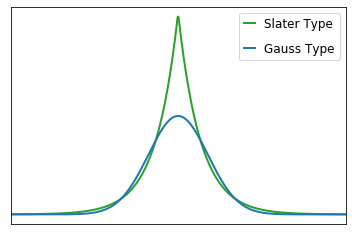

In [8]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(r, slatertype(1,r,0), lw=2, color='C2',label='Slater Type')  
ax.plot(r, gausstype(1.,a,r,0),'-', lw=2, markevery=4, ms=4,color='C0',label='Gauss Type')

art = []
lgd = ax.legend(fontsize=12,loc='upper right', 
                frameon=True, handlelength=0.9, 
                markerscale=1.0, labelspacing=1, 
                numpoints=1, ncol=1) 

ax.tick_params(labelsize=12, pad=3, width=1)
ax.set_xlim(-7.5, 7.5)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
# ax.axis('off')
art.append(lgd)

plt.show()

In [10]:
gto_01    = gausstype(1, a, r, -1)
gto_02    = gausstype(0.9, a, r, 0.5)
gto_03    = gausstype(1, a, r, -0.9)
gto_prod  = gto_01*gto_02
gto_prod2 = gto_01*gto_02*gto_03

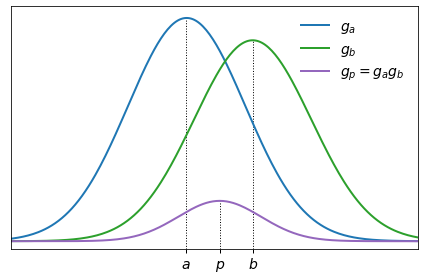

In [11]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(r, gto_01, lw=2, color='C0', label='$g_a$')
ax.plot(r, gto_02,  lw=2, color='C2', label='$g_b$')
ax.plot(r, gto_prod,lw=2, color='C4', label=r'$g_p = g_{a}g_b$')  

ax.vlines(r[gto_01.argmax()], gto_01.min() - 0.01, gto_01.max(), linestyle=':', linewidth=1.0)
ax.vlines(r[gto_02.argmax()], gto_02.min() - 0.01, gto_02.max(), linestyle=':', linewidth=1.0)
ax.vlines(r[gto_prod.argmax()], gto_prod.min() - 0.01, gto_prod.max(), linestyle=':', linewidth=1.0)

ax.legend(fontsize=14,loc='upper right', labelspacing=0.5, numpoints=1, ncol=1, frameon=False) 

ax.tick_params(labelsize=12, pad=15, width=1)

ax.set_xticks([r[gto_01.argmax()], r[gto_02.argmax()], r[gto_prod.argmax()]])
ax.set_yticks([])
ax.set_xticklabels(['$a$', '$b$', '$p$'], ha='center', va='baseline', fontsize=14)
ax.set_yticklabels([])

ax.set_xlim(-5.0, 4.25)
ax.set_ylim(-0.01)

plt.tight_layout()
plt.show()

In [12]:
print(r[gto_01.argmax()],r[gto_02.argmax()])
print((r[gto_01.argmax()]+r[gto_02.argmax()])/2)

-1.0119331742243434 0.5155131264916477
-0.24821002386634783


In [13]:
r[gto_prod.argmax()]

-0.24821002386634827

In [26]:
def f(width, height, distance):
#     plt.figure(2)
    fig, ax = plt.subplots()
    
    x = linspace(-10, 10, num=500)
    gauss_var = height*exp(-width*(x - distance)**2)
    ax.plot(x, gauss_var,lw=2)

    ax.set_ylim(-0.2, 8)
    
    plt.show()

interact(f, 
         width=widgets.FloatSlider(min=0.05, max=1.0, step=0.01, readout_format='.4f', continuous_update=False), 
        height=widgets.FloatSlider(min=0.1, max=7.5, step=0.1, readout_format='.4f', continuous_update=False),
         distance=widgets.FloatSlider(min=-2.5, max=2.5, step=0.1, readout_format='.4f', continuous_update=False),
        );

interactive(children=(FloatSlider(value=0.05, continuous_update=False, description='width', max=1.0, min=0.05,…

In [28]:
def plt_psi(z,d,d2):
    fig, ax = plt.subplots()
    r = linspace(-8, 8, 420)
    gto1 = gausstype(z,a,r,d)
    gto2 = gausstype(1,a,r,d2)
    ax.plot(r, gausstype(z,a,r,d), c='C0',lw=3, alpha=1)
    ax.plot(r, gausstype(1,a,r,d2), c='C2',lw=3, alpha=1)
    ax.plot(r, gto1*gto2, c='C4',lw=3, alpha=1)
    
    ax.set_ylim(0, 0.3)
    ax.set_xlim(-7.5,7.5)
    
    ax.set_xlabel(r'$r$')
    plt.show()
    
r = linspace(-8, 8, 420)
interact(plt_psi, 
         z  = widgets.FloatSlider(min=0.5, max=1.0, step=0.05, readout_format='.4f', continuous_update=False), 
         d  = widgets.FloatSlider(min=-3, max=3, step=0.1, readout_format='.4f', continuous_update=False),
         d2 = widgets.FloatSlider(min=-3, max=3, step=0.1, readout_format='.4f', continuous_update=False),
        );

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='z', max=1.0, min=0.5, reado…

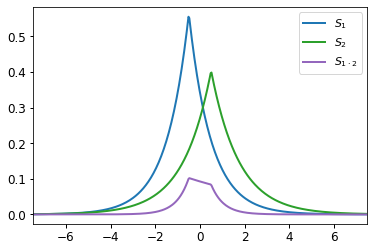

In [29]:
a = alpha    
sto_01   = slatertype(1,r,-0.5)
sto_02   = slatertype(0.8,r, 0.5)
sto_prod = sto_01*sto_02

# r = linspace(-7.5, 7.5, 200)

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(r, sto_01, linewidth=2,color='C0', label='$S_1$')
ax.plot(r, sto_02, linewidth=2, color='C2', label='$S_2$')

ax.plot(r, sto_prod, linewidth=2,color='C4',label=r'$S_{1\cdot 2}$')  

ax.legend(fontsize=11,loc='upper right', labelspacing=0.5, numpoints=1, ncol=1) 
ax.tick_params(labelsize=12,pad=3,width=1)
art.append(lgd)
ax.set_xlim(-7.5,7.5)
plt.show()

In [31]:
def plt_psi(z,d,d2):
    fig, ax = plt.subplots()
    r = linspace(-8, 8, 420)
    sto1 = slatertype(z,r,d)
    sto2 = slatertype(1,r,d2)
    ax.plot(r, slatertype(z,r,d), c='C0',lw=3, alpha=1)
    ax.plot(r, slatertype(1,r,d2), c='C2',lw=3, alpha=1)
    ax.plot(r, sto1*sto2, c='C4',lw=3, alpha=1)
    
    ax.set_ylim(-0.01, 0.6)
    ax.set_xlim(-7.5,7.5)
    ax.set_xlabel(r'$r$')
    plt.show()

In [32]:
interact(plt_psi, 
         z=widgets.FloatSlider(min=0.5, max=1.0, step=0.05, readout_format='.4f', continuous_update=False), 
        d=widgets.FloatSlider(min=-3, max=3, step=0.1, readout_format='.4f', continuous_update=False),
         d2=widgets.FloatSlider(min=-3, max=3, step=0.1, readout_format='.4f', continuous_update=False),
        );

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='z', max=1.0, min=0.5, reado…

In [33]:
a1 = 0.151623
a2 = 0.851819
c1 = 0.678914
c2 = 0.430129

gto_t1 =   gausstype(c1,a1,r,0)
gto_t2 =   gausstype(c2,a2,r,0)
gto_comb = gausstype(c1,a1,r,0) + gausstype(c2,a2,r,0)

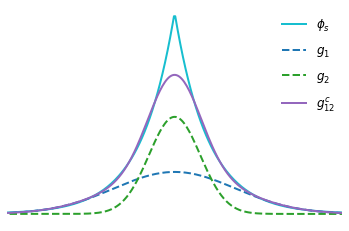

In [50]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(r,sto_simple, lw=2, c='C9',label=r'$\phi_{s}^{}$')
ax.plot(r,gto_t1,  lw=2,ls='--',c='C0',label='$g_1^{}$')

ax.plot(r, gto_t2, lw=2, ls='--', c='C2', label='$g_2^{}$')
ax.plot(r, gto_comb, lw=2, c='C4', label=r'$g_{12}^{c}$')
art = []
lgd = ax.legend(fontsize=12, loc=9, frameon=False, bbox_to_anchor=(0.90,1.00),  
                fancybox=True, markerscale=1.1, labelspacing=0.85, numpoints=1, ncol=1)

# ax.tick_params(labelsize=12, pad=3, width=1)
ax.set_xlim(-5,5)
ax.axis('off')
# os.chdir('basis_figs')
# plt.savefig('sto2g.pdf')
# os.chdir('..')
plt.show()

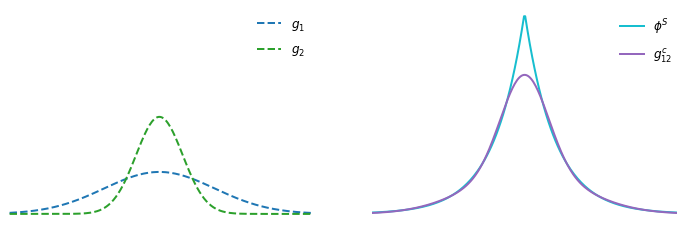

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6*2,4),sharey=True)

ax1.plot(r,gto_t1,  lw=2, ls='--', c='C0',label='$g_1^{}$')
ax1.plot(r,gto_t2,   lw=2, ls='--', c='C2',label='$g_2^{}$')

ax2.plot(r,sto_simple, lw=2, c='C9',label=r'$\phi_{}^{S}$')
ax2.plot(r,gto_comb, lw=2, c='C4', label=r'$g_{12}^{c}$')  

ax1.legend(fontsize=12,loc=9, frameon=False, bbox_to_anchor=(0.90,1.00),  
                fancybox=True, markerscale=1.0, labelspacing=0.85, numpoints=1, ncol=1) 
ax2.legend(fontsize=12,loc=9, frameon=False, bbox_to_anchor=(0.90,1.00),  
                fancybox=True, markerscale=1.1, labelspacing=0.85, numpoints=1, ncol=1) 

for ax in fig.axes:
    ax.set_xlim(-5,5)
    ax.axis('off')
    ax.tick_params(labelsize=12,pad=3,width=1)
plt.show()

In [37]:
coeffs =  array([0.444635, 0.535328, 0.154329])
alphas =  array([0.109818, 0.405771, 2.22766])
           
gto_tt1  = gausstype(coeffs[0], alphas[0], r, 0)
gto_tt2  = gausstype(coeffs[1], alphas[1], r, 0)
gto_tt3  = gausstype(coeffs[2], alphas[2], r, 0)

gto_comb2 = 0
for i in range(0, len(coeffs)):
    gto_comb2 += gausstype(coeffs[i], alphas[i], r, 0)

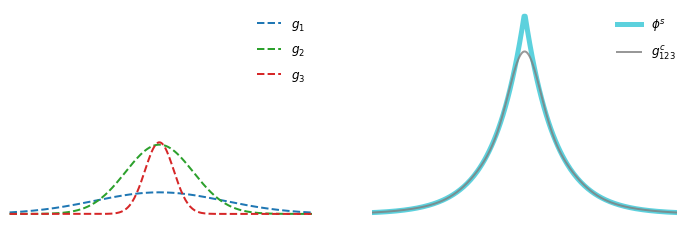

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6*2,4),sharey=True)

ax1.plot(r, gto_tt1,    lw=2, ls='--',c='C0', label='$g_1^{}$')
ax1.plot(r, gto_tt2,    lw=2, ls='--',c='C2', label='$g_2^{}$')
ax1.plot(r, gto_tt3,    lw=2, ls='--',c='C3', label='$g_3^{}$')
ax2.plot(r, sto_simple, lw=5, ls='-', c='C9', label='$\phi_{}^{s}$',alpha=0.7)
ax2.plot(r, gto_comb2,  lw=2, ls='-', c='C7', label=r'$g_{123}^{c}$',alpha=0.8)   

ax1.legend(fontsize=12, loc=9, frameon=False, bbox_to_anchor=(0.90,1.00),  
                fancybox=True, markerscale=1.0, labelspacing=0.85, numpoints=1, ncol=1) 
ax2.legend(fontsize=12, loc=9, frameon=False, bbox_to_anchor=(0.90,1.00),  
                fancybox=True, markerscale=1.1, labelspacing=0.85, numpoints=1, ncol=1) 

for ax in fig.axes:
    ax.set_xlim(-5,5)
    ax.axis('off')
    
plt.show()

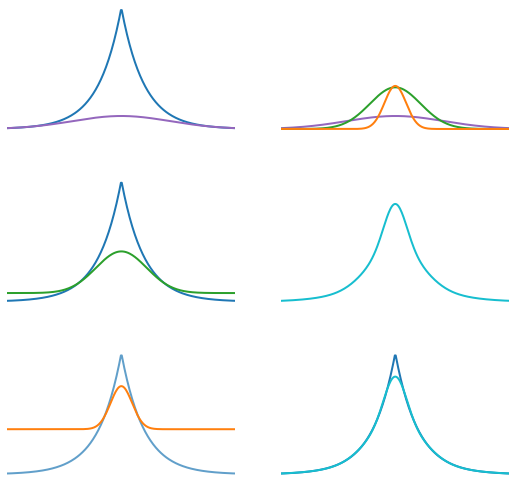

In [47]:
fig, axs = plt.subplots(3,2,figsize=((6*2)*0.75,(4*3)*0.75,))

ax0 = axs[0,0]
ax1 = axs[1,0]
ax2 = axs[2,0]
ax3 = axs[0,1]
ax4 = axs[1,1]
ax5 = axs[2,1]

ax0.plot(r, sto_simple, lw=2, color='C0')
ax0.plot(r, gto_tt1, lw=2, color='C4')

ax1.plot(r, sto_simple, lw=2, color='C0')
ax1.plot(r, gto_tt2 + 0.04, lw=2,color='C2')

ax2.plot(r, sto_simple, lw=2, color='C0', alpha=0.7)
ax2.plot(r, gto_tt3 + 0.21, lw=2, color='C1')

ax3.plot(r, gto_tt1, lw=2,color='C4')
ax3.plot(r, gto_tt2, lw=2,color='C2')
ax3.plot(r, gto_tt3, lw=2,color='C1')

ax4.plot(r, gto_comb2, lw=2, color='C9')

ax5.plot(r, sto_simple, lw=2,color='C0')
ax5.plot(r, gto_comb2, lw=2, color='C9')

for ax in fig.axes:
    ax.set_ylim(-0.1,0.57)
    ax.set_xlim(-5,5)
    ax.axis('off')

plt.show()

In [41]:
fitt_error = (0.1*r**2*(sto_simple - gto_comb2)**2)/2
print('Fitting Error =', fitt_error.sum()*4*pi)

Fitting Error = 0.000838288391727961


In [42]:
coeffs2 = [0.193572, 0.48257, 0.331816, 0.113541, 0.0221406]
alphas2 = [0.0744527,0.197572, 0.578648, 2.07173, 11.3056]


gto_comb3 = 0
for i in range(0,len(coeffs2)):
    gto_comb3 += gausstype(coeffs2[i],alphas2[i],r,0)

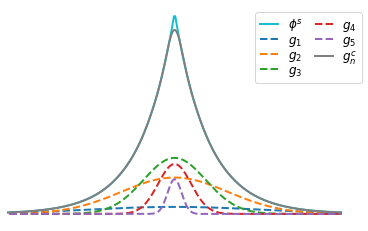

In [46]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(r, sto_simple,ls='-',lw=2, color='C9',  label='$\phi_{}^{s}$')
for i in range(5):
    ax.plot(r, gausstype(coeffs2[i], alphas2[i],r,0), ls='--', lw=2, label='$g_{{{:}}}$'.format(i+1))
    

ax.plot(r, gto_comb3, ls='-',lw=2, color='C7',  label='$g_{n}^{c}$')  


art = []
lgd = ax.legend(fontsize=12, loc=9, frameon=True, bbox_to_anchor=(0.90,1.00),  
                fancybox=True, markerscale=1.0, handlelength=1.5, 
                labelspacing=0.0, columnspacing=1, numpoints=1, ncol=2)

# ax.tick_params(labelsize=12,pad=10,width=2)

ax.set_xlim(-5,5)
art.append(lgd)

ax.axis('off')

plt.show()

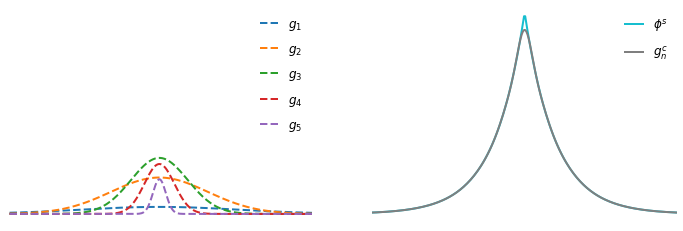

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6*2,4), sharey=True)

for i in range(5):
    ax1.plot(r, gausstype(coeffs2[i],alphas2[i],r,0), ls='--', lw=2, label='$g_{{{:}}}$'.format(i+1))

ax2.plot(r, sto_simple, ls='-', lw=2, color='C9', label='$\phi_{}^{s}$')
ax2.plot(r, gto_comb3, ls='-', lw=2, color='C7', label='$g_{n}^{c}$') 

art = []
lgd = ax1.legend(fontsize=12, loc=9, frameon=False, bbox_to_anchor=(0.90,1.00),  
                 fancybox=True, markerscale=1.0, handlelength=1.5, 
                 labelspacing=0.85, numpoints=1, ncol=1)
art.append(lgd)
lgd = ax2.legend(fontsize=12, loc=9, frameon=False, bbox_to_anchor=(0.90,1.00),  
                 fancybox=True, markerscale=1.0, handlelength=1.5, 
                 labelspacing=0.85, numpoints=1, ncol=1) 

for ax in fig.axes:
    ax.set_xlim(-5,5)
    ax.axis('off')

art.append(lgd)

plt.show()